In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("delivery_time.csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data = data.rename({'Delivery Time': 'DeliveryTime', 'Sorting Time':'SortingTime' },axis=1)

In [5]:
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


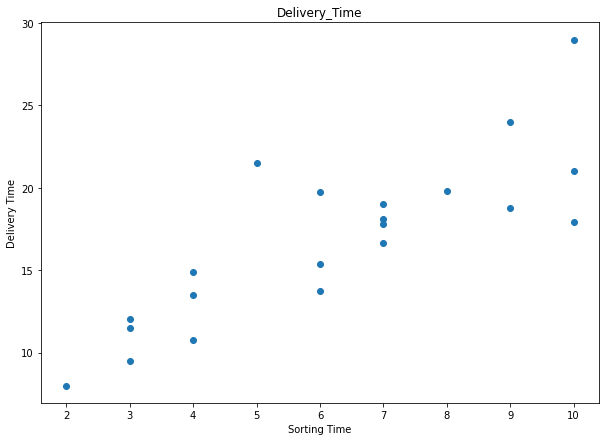

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(data.SortingTime,data.DeliveryTime)
plt.title("Delivery_Time")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [7]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

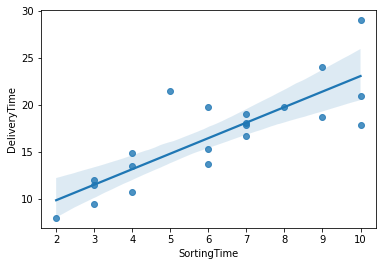

In [8]:
sns.regplot(x= data['SortingTime'],y=data['DeliveryTime'])

# model fitting

In [9]:
model = smf.ols("DeliveryTime~SortingTime", data=data).fit()

In [10]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        13:06:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As R squared is less we are trying with log(sortingtime)

In [12]:
model1 = smf.ols('DeliveryTime~np.log(SortingTime)',data=data).fit()

In [13]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        13:06:55   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Still R squared is less we are trying with log model of delivery time

In [14]:
model2= smf.ols('np.log(DeliveryTime)~SortingTime',data=data).fit()

In [15]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Sat, 15 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                          13:06:59   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
data["SortingTime_sq"]= data.SortingTime**2

# Still R squared is less we are trying with model3 

In [18]:
model3 = smf.ols('np.log(DeliveryTime)~SortingTime+SortingTime_sq',data=data).fit()

In [19]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Sat, 15 Oct 2022   Prob (F-statistic):           2.20e-06
Time:                          13:07:51   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pd.DataFrame(model3.predict(data[['SortingTime','SortingTime_sq']]))

,0
0,3.074863
1,2.557942
2,2.832974
3,3.052913
4,3.074863
5,2.832974
6,2.931968
7,2.381905
8,3.074863
9,3.052913


In [21]:
data

,DeliveryTime,SortingTime,SortingTime_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


# Predict the model

In [23]:
predicted = pd.DataFrame()

In [24]:
predicted['SortingTime'] = data.SortingTime


In [25]:
predicted['DeliveryTime']= data.DeliveryTime

In [26]:
predicted

,SortingTime,DeliveryTime
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00
5,6,15.35
6,7,19.00
7,3,9.50
8,10,17.90
9,9,18.75


In [27]:
predicted['predicted_DeliveryTime']=np.exp(model3.predict(data[['SortingTime','SortingTime_sq']]))

In [28]:
predicted

,SortingTime,DeliveryTime,predicted_DeliveryTime
0,10,21.00,21.646921
1,4,13.50,12.909227
2,6,19.75,16.995933
3,9,24.00,21.176938
4,10,29.00,21.646921
5,6,15.35,16.995933
6,7,19.00,18.764526
7,3,9.50,10.825502
8,10,17.90,21.646921
9,9,18.75,21.176938
